In [97]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import calendar
import datetime

In [98]:
Sig_Eqs = pd.read_csv('earthquakes-2022-10-28_13-25-07_+0800.tsv', sep='\t')
print(Sig_Eqs.shape)
Sig_Eqs.head()

(6338, 48)


,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [99]:
#Question1_1

#按国家分组求和
Sig_Eqs_country = Sig_Eqs.groupby('Country')['Deaths'].sum()

#总死亡人数排名前20的国家及死亡人数
print('Top 20 countries along with the total number of deaths:\n',Sig_Eqs_country.sort_values(ascending=False)[0:20])

Top 20 countries along with the total number of deaths:
 Country
CHINA           2075019.0
TURKEY          1134569.0
IRAN            1011446.0
ITALY            498477.0
SYRIA            439224.0
HAITI            323474.0
AZERBAIJAN       317219.0
JAPAN            278142.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135479.0
TURKMENISTAN     117412.0
PERU             102219.0
ISRAEL            90388.0
PORTUGAL          83531.0
GREECE            79174.0
CHILE             64276.0
INDIA             63491.0
TAIWAN            57135.0
Name: Deaths, dtype: float64


<AxesSubplot:xlabel='Year'>

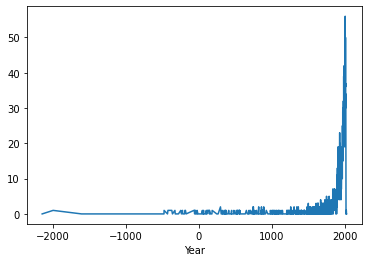

In [100]:
#Question1_2

#创建计数列Count，初始值全为0
Sig_Eqs['Count'] = 0

#当Ms>3时，把该行的count替换为1
Sig_Eqs.loc[Sig_Eqs['Ms']>3,'Count'] = 1

#按year分组求count的和，作图
Sig_Eqs.groupby('Year').sum()['Count'].plot()

#Answers to questions:
#1. The general trend is that the number of earthquakes (Ms > 3) 
#per year increased sharply after 1500 A.D. and stabilized at less
#than 10 before that.
#2. The possible reasons for this are the lack of measurement and 
#recording of earthquakes before 1500 A.D. and the slow transmission
#of information, which may have led to only a few earthquakes of 
#large magnitude being recorded.

In [101]:
#Question1_3

#计算国家地震次数放入Eqs_Number列
Sig_Eqs['Eqs_Number'] = Sig_Eqs.groupby('Country')['Country'].transform('count')


#按国家分组后每个组调用Get_LargestEq(),找到所有国家Ms最大值所在的行，
#返回国家名、地震时间、位置名、经纬度、Ms的值、总地震次数信息
def CountEq_LargestEq():
    #对每个组调用 Get_LargestEq函数，返回最大Ms所在行
    largest_eqs = Sig_Eqs.groupby('Country',as_index=False).apply(Get_LargestEq)
    df = largest_eqs[['Country','Year','Mo','Dy','Location Name','Ms','Eqs_Number']]
    df = df.rename(columns={'Ms':'Ms_Max'})
    df = df.sort_values('Ms_Max',ascending=False)
    return df


#分组找最大值，没有Ms数据的国家地震数据不处理，返回每个国家Ms最大值（或NaN）所在行
def Get_LargestEq(x):
    df = x.sort_values(by = 'Ms',ascending=True)
    if df['Ms'].sum() != 0:
        df=df.dropna(axis=0, how='any', thresh=None, subset=['Ms'], inplace=False)
    return df.iloc[-1,:]

#输入任意国家名，返回上述地震坐标
df2=CountEq_LargestEq()
a = input("\nInput country name(just one, eg.'CHINA'):")
print(eval('df2[df2["Country"]==a]'))

#打印Ms最大的前20个国家的国家名、地震时间、地点、Ms、总地震次数Eqs_Number
#Ms_Max为该国家发生过的有记录的最大地震级别
CountEq_LargestEq()

#从结果可以看出：
#1. 有记录的最大地震发生在美国，Ms_max=9.1，自2150 B.C.以来美国发生过的地震次数为271次，日期和位置信息见下表
#2. 其他国家信息也可以看到


Input country name(just one, eg.'CHINA'):CHINA
   Country    Year    Mo    Dy                            Location Name  \
28   CHINA  1920.0  12.0  16.0  CHINA:  GANSU PROVINCE, SHANXI PROVINCE   

    Ms_Max  Eqs_Number  
28     8.6       616.0  


,Country,Year,Mo,Dy,Location Name,Ms_Max,Eqs_Number
147,USA,1957.0,3.0,9.0,ALASKA,9.1,271.0
64,INDONESIA,2004.0,12.0,26.0,INDONESIA: SUMATRA: ACEH: OFF WEST COAST,8.8,405.0
62,INDIA,1897.0,6.0,12.0,INDIA: ASSAM; BANGLADESH,8.7,99.0
27,CHILE,1730.0,7.0,8.0,CHILE: VALPARAISO,8.7,198.0
107,PHILIPPINES,1897.0,9.0,21.0,"PHILIPPINES: MINDANAO, ZAMBOANGA, SULU, ISABELA",8.7,222.0
...,...,...,...,...,...,...,...
128,SRI LANKA,1882.0,1.0,NaN,SRI LANKA: TRINCOMALEE,NaN,1.0
130,SWITZERLAND,2006.0,12.0,8.0,SWITZERLAND: BASEL,NaN,31.0
136,TOGO,1933.0,5.0,19.0,TOGO: GOLD COAST,NaN,2.0
146,URUGUAY,1888.0,6.0,5.0,URUGUAY: COLOGNE,NaN,1.0


C:\Users\yyl\AppData\Local\Temp\ipykernel_12064\3314586153.py:4: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  Baoan_Weather = pd.read_csv('Baoan_Weather_1998_2022.csv')


<AxesSubplot:xlabel='DATE', ylabel='Temperature'>

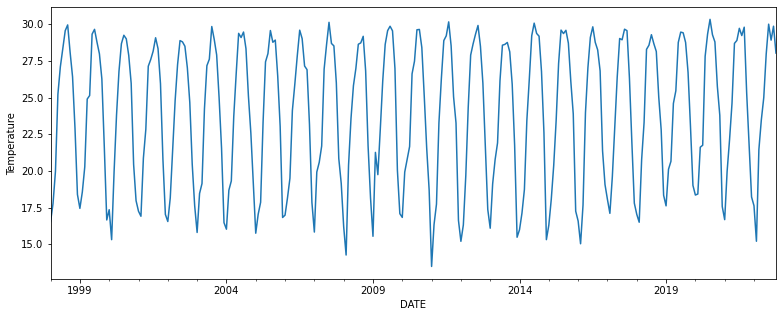

In [102]:
#Question2

#1.读取Q2数据
Baoan_Weather = pd.read_csv('Baoan_Weather_1998_2022.csv')

#2.用‘，’拆分列，并存入新DataFrame中
df = pd.DataFrame()
df[['Temperature','Code']] =Baoan_Weather['TMP'].str.split(',',expand=True)

#3.用正则表达式提取温度后三位值
df['Temperature'] = df['Temperature'].str.extract('([1-9][0-9][0-9])',flags=0, expand=False) 

#4.将温度和其后的代码存入原DataFrame中
Baoan_Weather[['Temperature','Code']] = df[['Temperature','Code']]

#5.将温度值缺失或者code为'3','7'的错误值删去
Baoan_Weather = Baoan_Weather.dropna(axis=0, how='any', thresh=None, subset=['Temperature'], inplace=False)
Baoan_Weather.drop(Baoan_Weather[(Baoan_Weather['Code'].astype(int) == 3)|(Baoan_Weather['Code'].astype(int) == 7)|(Baoan_Weather['Temperature'].astype(int) == 999) ].index, inplace=True)

#6.将温度值改为摄氏度值，除以放缩系数
Baoan_Weather['Temperature'] = Baoan_Weather['Temperature'].astype(int)/10

#7.将DataFrame中的时间转换为datetime64 
Baoan_Weather['DATE']= Baoan_Weather['DATE'].astype('datetime64')

#8.用时间序列做为Baoan_Weathe的索引，为下一步resample做铺垫
Baoan_Weather.rename(index = Baoan_Weather['DATE'],inplace=True)

#9.利用resample对按月求均值，再取温度列作图
Baoan_Weather.resample('M').mean()['Temperature'].plot(xlabel = 'DATE',ylabel = 'Temperature',figsize=(13,5),)

#是否存在趋势：
#1. 月平均气温总体在[15~30]℃间波动，并无大的变化，但在[2005-2015]10年间的波动幅度更加明显，出现了较极端的气温；
#2. 2015年后波动中心，有上升趋势，即年平均温度有增大趋势；

In [103]:
#Question3

#导入csv文件
ibtracs_df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME',' '])
#预览前几行
ibtracs_df.head()

C:\Users\yyl\AppData\Local\Temp\ipykernel_12064\1192491116.py:4: DtypeWarning: Columns (5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ibtracs_df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN,NaN,main,0,0.0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN,NaN,main,0,0.0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN,NaN,main,0,0.0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN,NaN,main,0,0.0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,NaN,NaN,NaN,main,0,0.0,__________P___


In [104]:
#Question3_1

#先分组找最大值
df1 = ibtracs_df.groupby("SID").agg('max')

#再把['NAME','WMO_WIND']取出来按风速排序，打印前十行
df2 = df1[['NAME','WMO_WIND']]
df2.sort_values('WMO_WIND',ascending=False)[0:10]

C:\Users\yyl\AppData\Local\Temp\ipykernel_12064\3850662889.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df1 = ibtracs_df.groupby("SID").agg('max')


,NAME,WMO_WIND
SID,,
2015293N13266,PATRICIA,185.0
1980214N11330,ALLEN,165.0
2019236N10314,DORIAN,160.0
1988253N12306,GILBERT,160.0
2005289N18282,WILMA,160.0
1935241N23291,NaN,160.0
1997253N12255,LINDA,160.0
2017242N16333,IRMA,155.0
1998295N12284,MITCH,155.0


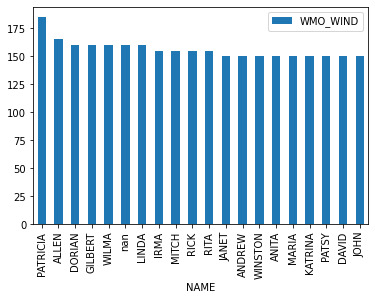

In [52]:
#Question3_2

#排序并画图
df3 = df2.sort_values('WMO_WIND',ascending=False)[0:20]
df3.plot('NAME','WMO_WIND', kind='bar')

plt.show()

Text(0, 0.5, 'Count')

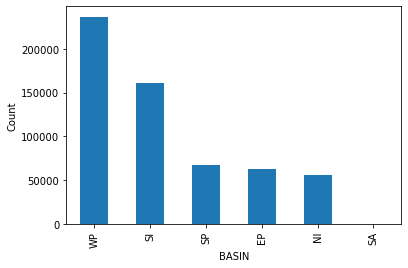

In [65]:
#Question3_3

#按BASIN分组计数，如何对SID排序作图
ibtracs_df.groupby('BASIN').count()['SID'].sort_values(ascending=False).plot(kind = 'bar')

plt.ylabel('Count')

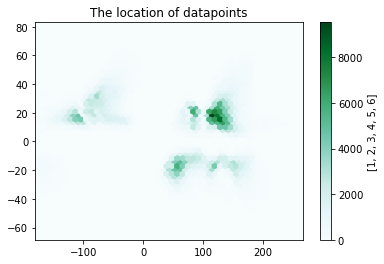

In [84]:
#Question3_4

#借鉴：https://www.geeksforgeeks.org/matplotlib-pyplot-hexbin-function-in-python/
x = ibtracs_df['LON']
y = ibtracs_df['LAT'] 

xmin = x.min() 
xmax = x.max() 
ymin = y.min() 
ymax = y.max() 
    
hb = plt.hexbin(x, y, gridsize = 50,bins=None, cmap ='BuGn') 
    
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
    
cb = plt.colorbar(hb) 
cb.set_label(z)
plt.title('The location of datapoints')
  
plt.show()

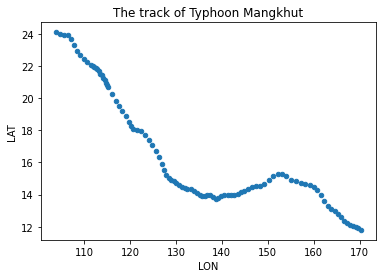

In [105]:
#Question3_5

# 定位MANGKHUT位置，返回满足条件的经纬度值
MANGKHUT_df = ibtracs_df[(ibtracs_df['NAME'] == 'MANGKHUT') & (ibtracs_df['SEASON'] == 2018)][['LAT','LON']]

#绘制散点图
MANGKHUT_df.plot.scatter('LON','LAT')
plt.title('The track of Typhoon Mangkhut')
  
plt.show()

In [5]:
#Question3_6

#筛选1970年以来的WP、EP数据
Filtered_df = ibtracs_df[((ibtracs_df['BASIN'] == 'WP') | (ibtracs_df['BASIN'] == 'EP')) & (ibtracs_df['SEASON'] > 1969)]
Filtered_df.head(5)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006.0,tokyo,main,1088,1088.0,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,NaN,NaN,main,1109,1109.0,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002.0,tokyo,main,1143,1143.0,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,NaN,NaN,main,1171,1168.0,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998.0,tokyo,main,1182,1179.0,_OO___________


C:\Users\yyl\AppData\Local\Temp\ipykernel_12064\1453633337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_df.rename(index = Filtered_df['ISO_TIME'],inplace=True)


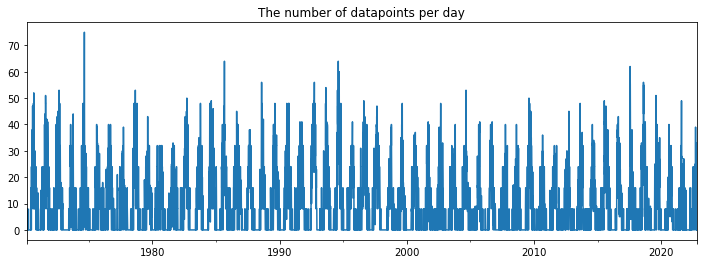

In [6]:
#Question3_7

#将索引值换位时间序列
Filtered_df.rename(index = Filtered_df['ISO_TIME'],inplace=True)

#按天分组求和作图
Filtered_df.resample('D')['SID'].count().plot(figsize = (12,4))

plt.title('The number of datapoints per day') 
plt.show()

In [60]:
#Question3_8

#输入时间，返回年积日
def tran_day_year(date):
    date_base = datetime.datetime(date.year,1,1)
    doy = (date - date_base).days + 1
    return doy

#调用 tran_day_year，返回年积日对应得数据点数
def day_of_year(x):
    #对DataFrame预处理，统计年积日次数
    df_ymd = Filtered_df.resample('D')['SID'].count().to_frame().reset_index()
    df_ymd.columns = ['Date_Ymd','Data_Number']
    df_ymd['Year_Day'] = df_ymd['Date_Ymd'].apply(tran_day_year)
    df_count = df_ymd.groupby('Year_Day')['Data_Number'].sum()
    print(df_count)
    Number = df_count[x]
    return Number

#输入一个年积日，返回所有1970年以来数据点数
x = input('输入一个1~366的年积日数字：')
x = int(x)
print('发生在（1970~2022年）同一年积日的数据点总数个为:\n',day_of_year(x))

#助教请忽略
#没用的代码，留着以后看，xixi
#df_ymd['Year'] = df_ymd['Date_Ymd'].dt.year
#df_ymd['Month'] = df_ymd['Date_Ymd'].dt.month
#df_ymd['Day'] = df_ymd['Date_Ymd'].dt.day
#df_ymd['Year_Type'] = df_ymd['Year'].apply(calendar.isleap)
#print(df_ymd.head(6))
#取datatime 年月日的方法： df[].str[0:4]; dt.year; 

输入一个1~366的年积日数字：2
Year_Day
1       83
2       72
3       74
4       93
5      105
      ... 
362    158
363    132
364    104
365     93
366     13
Name: Data_Number, Length: 366, dtype: int64
发生在（1970~2022年）同一年积日的数据点总数个为:
 72


In [95]:
#Question3_9

#返回年积日
def tran_day_year1(date):
    date_base = datetime.datetime(date.year,1,1)
    doy = (date - date_base).days + 1
    return doy

#返回每个年积日出现次数均值
def average(x):
    y = df_count.loc[df_count.index[x-1],'Average'];
    return y

#数据预处理
df_ymd = Filtered_df.resample('D')['SID'].count().to_frame().reset_index()
df_ymd.columns = ['Date_Ymd','Data_Number']
df_ymd['Year_Day'] = df_ymd['Date_Ymd'].apply(tran_day_year1)

#新dataframe，放结果
df_count = pd.DataFrame()
df_count['Sum'] = df_ymd.groupby('Year_Day')['Data_Number'].sum().to_frame()
df_count['Number'] = df_ymd.groupby('Year_Day')['Data_Number'].count()
df_count['Average'] = df_count['Sum']/df_count['Number']
df_count = df_count.reset_index()

#某天的Anomaly = 某天出点次数 - 该天的多年平均值
df_ymd['Anomaly'] = df_ymd['Data_Number'] - df_ymd['Year_Day'].apply(average)

#返回日期对应的Anomaly
df_ymd[['Date_Ymd','Anomaly']]

,Date_Ymd,Anomaly
0,1970-02-19,7.018868
1,1970-02-20,7.094340
2,1970-02-21,7.188679
3,1970-02-22,7.377358
4,1970-02-23,7.490566
...,...,...
19224,2022-10-08,-17.245283
19225,2022-10-09,-17.301887
19226,2022-10-10,-12.396226
19227,2022-10-11,-18.528302


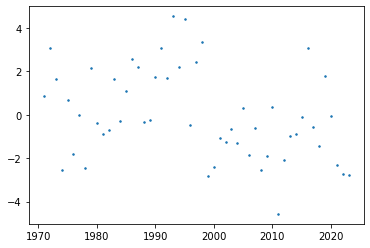

In [96]:
#Question3_10

#将时间换为索引，便于resample，作图
df_ymd.rename(index = df_ymd['Date_Ymd'],inplace=True)

#分组求年均值
df_ano = df_ymd.resample('Y')['Anomaly'].mean()
plt.plot_date(df_ano.index,df_ano,markersize=1.5)

In [55]:
#Question4_1

#导入数据到xi_an_df
xi_an_df = pd.read_csv('data.csv',parse_dates=['Date'],na_values=[' '])
xi_an_df.head(10)

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,1951-01-01,NaN,44.0,22,0.00,NaN,NaN
1,1951-01-02,29.0,49.0,19,0.00,NaN,NaN
2,1951-01-03,32.0,51.0,21,0.00,NaN,NaN
3,1951-01-04,27.0,36.0,18,0.00,NaN,NaN
4,1951-01-05,29.0,32.0,23,0.05,NaN,NaN
5,1951-01-06,30.0,32.0,28,0.02,NaN,NaN
6,1951-01-07,31.0,33.0,30,0.00,NaN,NaN
7,1951-01-08,34.0,39.0,31,0.01,NaN,NaN
8,1951-01-09,27.0,32.0,20,0.19,NaN,NaN
9,1951-01-10,24.0,34.0,18,0.01,NaN,NaN


<AxesSubplot:xlabel='Year', ylabel='PRCP (Inches)'>

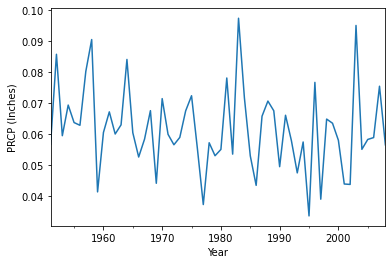

In [56]:
#Question4_2

#将Date转换为时间序列索引
xi_an_df.rename(index=xi_an_df['Date'],inplace=True)

#绘制年均气温TAVG (Degrees Fahrenheit)随年份变化折线图
xi_an_df.resample('Y').mean()['PRCP (Inches)'].plot(xlabel='Year',ylabel='PRCP (Inches)')

In [59]:
#Question4_3

#对西安市1951-2008年降雨数据进行统计分析，计算均值、最大、最小值、方差、中位数

#求西安市年平均降雨量
Prcp = pd.DataFrame()
Prcp['Prcp'] = xi_an_df.resample('Y')['PRCP (Inches)'].mean()
print('1.年平均降雨量（Inches）：\n',Prcp.head(5))

#求西安市年多年平均降雨量（1951-2008年）
Prcp_Mean = Prcp['Prcp'].sum()/len(Prcp)
print('2.多年平均降雨量（Inches）：\n',Prcp_Mean)

#西安市日极端最高、最低降雨
Prcp_max = xi_an_df['PRCP (Inches)'].max()
Prcp_min = xi_an_df['PRCP (Inches)'].min()
print('3.西安日极端最高、最低降雨分别为：（Inches）\n',Prcp_max, Prcp_min)

#西安市日极端降雨量中位数
Prcp_mid = xi_an_df['PRCP (Inches)'].median()
print('4.西安日降雨中位数：（Inches）\n',Prcp_mid)


#西安市1951-2022年平均降雨的方差
Tem_var = xi_an_df.resample('Y').mean()['PRCP (Inches)'].var()
print('5.西安年平均降雨的方差：\n',Tem_var)

1.年平均降雨量（Inches）：
                 Prcp
1951-12-31  0.056740
1952-12-31  0.085792
1953-12-31  0.059507
1954-12-31  0.069397
1955-12-31  0.063753
2.多年平均降雨量（Inches）：
 0.061657593395218944
3.西安日极端最高、最低降雨分别为：（Inches）
 4.36 0.0
4.西安日降雨中位数：（Inches）
 0.0
5.西安年平均降雨的方差：
 0.00018492030671217607
